In [1]:
from __future__ import absolute_import,division,print_function,unicode_literals
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
import sys

# Add the directory containing the Python file to the `sys.path` list
sys.path.append("/IMP DOCUMENT/College material/SEM6/AIProject/Ozone-Prediction-AIProject/Support")

# Import the Python file
import LSTM_Model
import TsPreProcessing

In [12]:
data = pd.read_excel('Bawana_CombinedData.xlsx', sheet_name='Sheet1')
data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,Benzene,Toluene,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,01-07-2018 00:00,02-07-2018 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
1,02-07-2018 00:00,03-07-2018 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2,03-07-2018 00:00,04-07-2018 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
3,04-07-2018 00:00,05-07-2018 00:00,54.29,155.33,0.51,15.2,8.52,0.89,48.61,1.2,20.31,74.25,1.59,157.11,5.93,974.37,31.21,0,0.0
4,05-07-2018 00:00,06-07-2018 00:00,54.49,143.51,1.26,18.53,10.86,0.8,45.87,1.53,44.97,68.31,1.56,119.32,215.54,975.2,32,0.01,0.5


In [13]:
data2 = pd.read_excel('Bawana2022-23.xlsx', sheet_name='Sheet1')
data2.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Toluene,Temp,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,01-01-2022 00:00,02-01-2022 00:00,243.38,364.66,34.92,19.40,54.30,60.19,2.35,1.43,...,None,None,72.93,0.44,208.74,90.49,998.05,11.53,0.00,0.0
1,02-01-2022 00:00,03-01-2022 00:00,252.62,383.88,22.30,20.99,43.28,61.92,2.65,1.39,...,None,None,73.26,0.47,230.23,87.69,997.00,12.27,0.00,0.0
2,03-01-2022 00:00,04-01-2022 00:00,289.33,435.06,30.83,26.21,56.97,62.49,2.84,1.55,...,None,None,72.26,0.42,233.32,92.54,995.10,13.26,0.00,0.0
3,04-01-2022 00:00,05-01-2022 00:00,265.04,435.61,51.90,22.38,74.27,67.68,4.42,1.66,...,None,None,66.51,0.50,195.17,82.27,994.36,15.57,0.00,0.0
4,05-01-2022 00:00,06-01-2022 00:00,289.21,425.70,46.29,21.62,67.89,80.92,2.63,1.77,...,None,None,82.16,0.96,167.27,19.33,993.30,13.60,0.05,5.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  1280 non-null   object 
 1   To Date    1280 non-null   object 
 2   PM2.5      1280 non-null   object 
 3   PM10       1280 non-null   object 
 4   NO         1280 non-null   object 
 5   NO2        1280 non-null   object 
 6   NOx        1280 non-null   object 
 7   CO         1280 non-null   object 
 8   Ozone      1280 non-null   object 
 9   Benzene    1280 non-null   object 
 10  Toluene    1280 non-null   object 
 11  RH         1280 non-null   object 
 12  WS         1280 non-null   object 
 13  WD         1280 non-null   object 
 14  SR         1280 non-null   object 
 15  BP         1280 non-null   object 
 16  AT         1280 non-null   object 
 17  RF         1280 non-null   object 
 18  TOT-RF     1280 non-null   float64
dtypes: float64(1), object(18)
memory usage: 190.1+ K

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  452 non-null    object 
 1   To Date    452 non-null    object 
 2   PM2.5      452 non-null    float64
 3   PM10       452 non-null    float64
 4   NO         452 non-null    float64
 5   NO2        452 non-null    float64
 6   NOx        452 non-null    float64
 7   NH3        452 non-null    float64
 8   SO2        452 non-null    object 
 9   CO         452 non-null    object 
 10  Ozone      452 non-null    float64
 11  Benzene    452 non-null    object 
 12  Toluene    452 non-null    object 
 13  Temp       452 non-null    object 
 14  RH         452 non-null    float64
 15  WS         452 non-null    float64
 16  WD         452 non-null    float64
 17  SR         452 non-null    float64
 18  BP         452 non-null    float64
 19  AT         452 non-null    float64
 20  RF        

In [22]:
# give a list of column not in data from data2
not_common_cols = data2.columns.difference(data.columns)
not_common_cols

Index(['NH3', 'SO2', 'Temp'], dtype='object')

In [23]:
data2.drop(not_common_cols, axis=1, inplace=True)
data2.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,Benzene,Toluene,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,01-01-2022 00:00,02-01-2022 00:00,243.38,364.66,34.92,19.40,54.30,1.43,12.59,None,None,72.93,0.44,208.74,90.49,998.05,11.53,0.00,0.0
1,02-01-2022 00:00,03-01-2022 00:00,252.62,383.88,22.30,20.99,43.28,1.39,13.48,None,None,73.26,0.47,230.23,87.69,997.00,12.27,0.00,0.0
2,03-01-2022 00:00,04-01-2022 00:00,289.33,435.06,30.83,26.21,56.97,1.55,14.31,None,None,72.26,0.42,233.32,92.54,995.10,13.26,0.00,0.0
3,04-01-2022 00:00,05-01-2022 00:00,265.04,435.61,51.90,22.38,74.27,1.66,11.03,None,None,66.51,0.50,195.17,82.27,994.36,15.57,0.00,0.0
4,05-01-2022 00:00,06-01-2022 00:00,289.21,425.70,46.29,21.62,67.89,1.77,6.96,None,None,82.16,0.96,167.27,19.33,993.30,13.60,0.05,5.0


In [24]:
final_data = pd.concat([data, data2], axis=0)
final_data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,Benzene,Toluene,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,01-07-2018 00:00,02-07-2018 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
1,02-07-2018 00:00,03-07-2018 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2,03-07-2018 00:00,04-07-2018 00:00,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
3,04-07-2018 00:00,05-07-2018 00:00,54.29,155.33,0.51,15.2,8.52,0.89,48.61,1.2,20.31,74.25,1.59,157.11,5.93,974.37,31.21,0,0.0
4,05-07-2018 00:00,06-07-2018 00:00,54.49,143.51,1.26,18.53,10.86,0.8,45.87,1.53,44.97,68.31,1.56,119.32,215.54,975.2,32,0.01,0.5


In [32]:
# Convert the date column to datetime
from datetime import datetime
df = final_data.copy()
# datae
df['From Date'] = df['From Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['To Date'] = df['To Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['From Date'].min(), df['From Date'].max()
df = df.set_index('To Date')
df.drop(['From Date'], axis=1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,Benzene,Toluene,RH,WS,WD,SR,BP,AT,RF,TOT-RF
To Date,,,,,,,,,,,,,,,,,
2018-07-02,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2018-07-03,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2018-07-04,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.0
2018-07-05,54.29,155.33,0.51,15.2,8.52,0.89,48.61,1.2,20.31,74.25,1.59,157.11,5.93,974.37,31.21,0,0.0
2018-07-06,54.49,143.51,1.26,18.53,10.86,0.8,45.87,1.53,44.97,68.31,1.56,119.32,215.54,975.2,32,0.01,0.5


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1732 entries, 2018-07-02 00:00:00 to 2023-03-28 15:17:00
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    1732 non-null   object 
 1   PM10     1732 non-null   object 
 2   NO       1732 non-null   object 
 3   NO2      1732 non-null   object 
 4   NOx      1732 non-null   object 
 5   CO       1732 non-null   object 
 6   Ozone    1732 non-null   object 
 7   Benzene  1732 non-null   object 
 8   Toluene  1732 non-null   object 
 9   RH       1732 non-null   object 
 10  WS       1732 non-null   object 
 11  WD       1732 non-null   object 
 12  SR       1732 non-null   object 
 13  BP       1732 non-null   object 
 14  AT       1732 non-null   object 
 15  RF       1732 non-null   object 
 16  TOT-RF   1732 non-null   float64
dtypes: float64(1), object(16)
memory usage: 243.6+ KB


In [34]:
# df.drop(['Temp'], axis=1, inplace=True)
num_cols = df.columns
num_cols

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'Ozone', 'Benzene',
       'Toluene', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF'],
      dtype='object')

In [35]:
df = df.replace('None', np.nan)
# iterate through the columns and convert to float
for col in num_cols:
    df[col] = df[col].astype(float)


In [36]:
print("Rows  :  ",df.shape[0])
print("Columns : ",df.shape[1])
print("\nFeatures : \n",df.columns.tolist())

Rows  :   1732
Columns :  17

Features : 
 ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF']


In [37]:

print("\nMissing values : \n",df.isnull().any())


Missing values : 
 PM2.5       True
PM10        True
NO          True
NO2         True
NOx         True
CO          True
Ozone       True
Benzene     True
Toluene     True
RH          True
WS          True
WD          True
SR          True
BP          True
AT          True
RF          True
TOT-RF     False
dtype: bool


In [38]:
print("\nUnique values : \n",df.nunique())


Unique values : 
 PM2.5      1631
PM10       1664
NO         1113
NO2        1443
NOx        1423
CO          263
Ozone      1486
Benzene      68
Toluene     646
RH         1464
WS          200
WD         1641
SR         1666
BP         1221
AT         1222
RF           45
TOT-RF       67
dtype: int64


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1732 entries, 2018-07-02 00:00:00 to 2023-03-28 15:17:00
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    1720 non-null   float64
 1   PM10     1688 non-null   float64
 2   NO       1722 non-null   float64
 3   NO2      1722 non-null   float64
 4   NOx      1722 non-null   float64
 5   CO       1715 non-null   float64
 6   Ozone    1721 non-null   float64
 7   Benzene  86 non-null     float64
 8   Toluene  664 non-null    float64
 9   RH       1727 non-null   float64
 10  WS       1727 non-null   float64
 11  WD       1727 non-null   float64
 12  SR       1727 non-null   float64
 13  BP       1726 non-null   float64
 14  AT       1726 non-null   float64
 15  RF       1727 non-null   float64
 16  TOT-RF   1732 non-null   float64
dtypes: float64(17)
memory usage: 243.6 KB


# Visualizing The Data for Ashok Vihar

In [40]:
oz_data = df['Ozone']
oz_data.head()

To Date
2018-07-02      NaN
2018-07-03      NaN
2018-07-04      NaN
2018-07-05    48.61
2018-07-06    45.87
Name: Ozone, dtype: float64

<AxesSubplot:xlabel='To Date'>

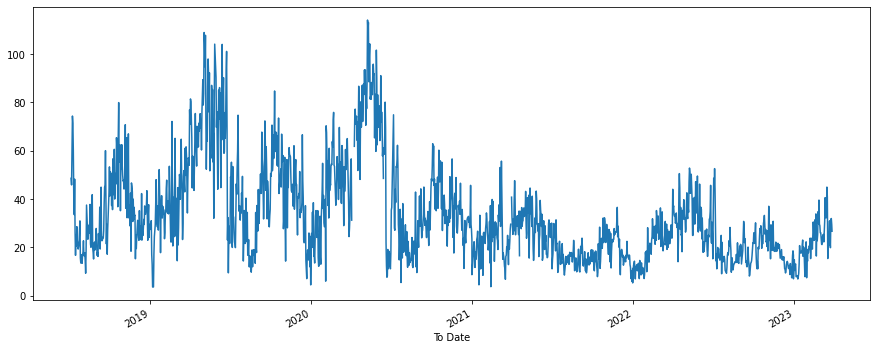

In [41]:
oz_data.plot(figsize=(15, 6))

In [42]:
import plotly.express as px
fig = px.line(oz_data, x=oz_data.index, y=oz_data.values, title='Ozone Concentration')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

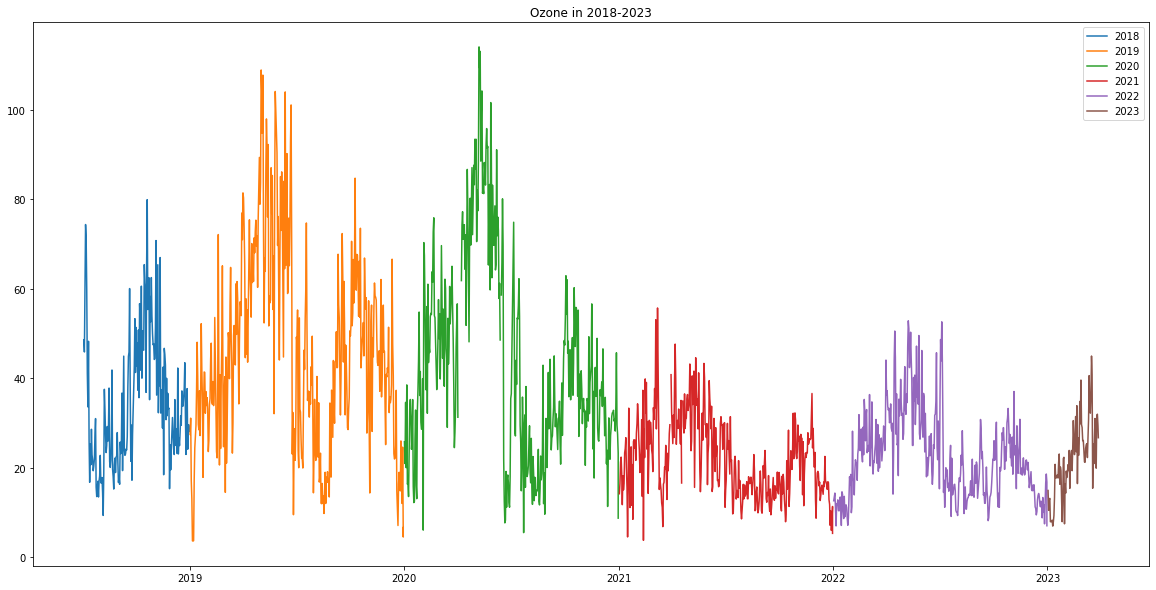

In [43]:

year = ['2018','2019','2020','2021','2022','2023']
# all plots in one figure
plt.figure(figsize=(20,10))
for i in year:
    df_year = df.loc[i]
    plt.plot(df_year['Ozone'],label=i)
plt.legend(loc='best')
plt.title('Ozone in 2018-2023')
plt.show()

In [66]:
# i want to group by month
aq_df = df.copy()
aq_df.isna().sum() / len(aq_df) * 100
aq_df.drop(['Benzene','Toluene'], axis=1, inplace=True)
# ss.head()
aq_df['month'] = df.index.month
aq_df['year'] = df.index.year
aq_df['day'] = df.index.day
aq_df.head()

,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WS,WD,SR,BP,AT,RF,TOT-RF,month,year,day
To Date,,,,,,,,,,,,,,,,,,
2018-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7,2018,2
2018-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7,2018,3
2018-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7,2018,4
2018-07-05,54.29,155.33,0.51,15.20,8.52,0.89,48.61,74.25,1.59,157.11,5.93,974.37,31.21,0.00,0.0,7,2018,5
2018-07-06,54.49,143.51,1.26,18.53,10.86,0.80,45.87,68.31,1.56,119.32,215.54,975.20,32.00,0.01,0.5,7,2018,6


In [67]:
aq_df.shape

(1732, 18)

(1661, 18)


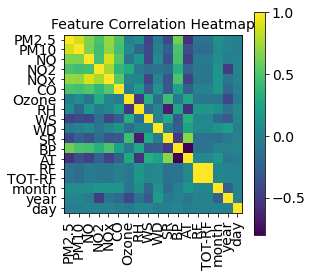

In [68]:
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()

aq_df.dropna(inplace=True)
print(aq_df.shape)
show_heatmap(aq_df)

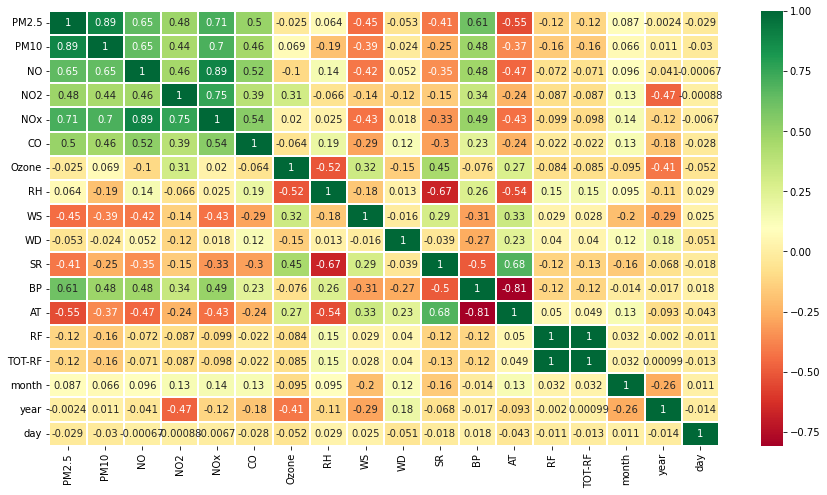

In [69]:
aq_df.dropna(inplace=True)
aq_corr = aq_df.corr(method='pearson')
g = sns.heatmap(aq_corr,annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# LSTM Model Training for Ashok Vihar

In [70]:
# dropping the null values
aq_df.dropna(inplace=True)
aq_df.isnull().sum()

PM2.5     0
PM10      0
NO        0
NO2       0
NOx       0
CO        0
Ozone     0
RH        0
WS        0
WD        0
SR        0
BP        0
AT        0
RF        0
TOT-RF    0
month     0
year      0
day       0
dtype: int64

In [71]:
aq_df.head()

,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,RH,WS,WD,SR,BP,AT,RF,TOT-RF,month,year,day
To Date,,,,,,,,,,,,,,,,,,
2018-07-05,54.29,155.33,0.51,15.20,8.52,0.89,48.61,74.25,1.59,157.11,5.93,974.37,31.21,0.00,0.0,7,2018,5
2018-07-06,54.49,143.51,1.26,18.53,10.86,0.80,45.87,68.31,1.56,119.32,215.54,975.20,32.00,0.01,0.5,7,2018,6
2018-07-07,74.42,183.05,1.04,13.14,7.85,0.72,59.02,60.47,1.31,78.86,231.37,975.34,33.33,0.00,0.0,7,2018,7
2018-07-08,70.82,175.86,0.80,13.93,8.07,0.82,74.37,56.59,1.53,81.52,256.90,974.58,34.16,0.00,0.0,7,2018,8
2018-07-09,98.12,236.08,4.18,20.29,14.19,0.90,71.38,53.43,1.26,114.64,273.26,973.52,35.25,0.00,0.0,7,2018,9


In [72]:
# define the train and test data
x_train = aq_df[:'2022-01-01']
y_train = x_train['Ozone']
x_test = aq_df['2022-01-01':]
y_test = x_test['Ozone']
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1213, 18), (1213,), (448, 18), (448,))

In [73]:
# transforming and normalizing the data
train_norm = TsPreProcessing.Transform_Normalize(x_train['Ozone'])
test_norm = TsPreProcessing.Transform_Normalize(x_test['Ozone'])

[0.40749118]
[0.38270153]
[0.50167375]
[0.64055008]
[0.6134986]
Number of null values in norm =  1
[0.12347561]
[0.14285714]
[0.16093206]
[0.08950348]
[0.00087108]
Number of null values in norm =  1


In [74]:
print(train_norm.shape)
print(test_norm.shape)

(1212,)
(447,)


In [75]:
n_steps = 15 #number of steps to look back
X_split_train, y_split_train = TsPreProcessing.split_sequence(train_norm, n_steps)
for i in range(len(X_split_train)):
    print(X_split_train[i], y_split_train[i])
n_features = 1 #number of features (in this case it is just the number of columns in the dataframe)
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

[0.40749118 0.38270153 0.50167375 0.64055008 0.6134986  0.50981634
 0.3396363  0.27151    0.40432462 0.20446937 0.11897222 0.19623632
 0.15452818 0.22627341 0.17461323] 0.16520401700895684
[0.38270153 0.50167375 0.64055008 0.6134986  0.50981634 0.3396363
 0.27151    0.40432462 0.20446937 0.11897222 0.19623632 0.15452818
 0.22627341 0.17461323 0.16520402] 0.14240477698362436
[0.50167375 0.64055008 0.6134986  0.50981634 0.3396363  0.27151
 0.40432462 0.20446937 0.11897222 0.19623632 0.15452818 0.22627341
 0.17461323 0.16520402 0.14240478] 0.1516330408034018
[0.64055008 0.6134986  0.50981634 0.3396363  0.27151    0.40432462
 0.20446937 0.11897222 0.19623632 0.15452818 0.22627341 0.17461323
 0.16520402 0.14240478 0.15163304] 0.16565638288247533
[0.6134986  0.50981634 0.3396363  0.27151    0.40432462 0.20446937
 0.11897222 0.19623632 0.15452818 0.22627341 0.17461323 0.16520402
 0.14240478 0.15163304 0.16565638] 0.21197864833076993
[0.50981634 0.3396363  0.27151    0.40432462 0.20446937 0.11

In [76]:
X_split_test, y_split_test = TsPreProcessing.split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))


[0.12347561 0.14285714 0.16093206 0.08950348 0.00087108 0.10823171
 0.10518293 0.12783101 0.07687282 0.07404181 0.11694251 0.14176829
 0.10431185 0.00326655 0.16702962] 0.15505226480836232
[0.14285714 0.16093206 0.08950348 0.00087108 0.10823171 0.10518293
 0.12783101 0.07687282 0.07404181 0.11694251 0.14176829 0.10431185
 0.00326655 0.16702962 0.15505226] 0.07208188153310105
[0.16093206 0.08950348 0.00087108 0.10823171 0.10518293 0.12783101
 0.07687282 0.07404181 0.11694251 0.14176829 0.10431185 0.00326655
 0.16702962 0.15505226 0.07208188] 0.03680313588850173
[0.08950348 0.00087108 0.10823171 0.10518293 0.12783101 0.07687282
 0.07404181 0.11694251 0.14176829 0.10431185 0.00326655 0.16702962
 0.15505226 0.07208188 0.03680314] 0.14503484320557491
[0.00087108 0.10823171 0.10518293 0.12783101 0.07687282 0.07404181
 0.11694251 0.14176829 0.10431185 0.00326655 0.16702962 0.15505226
 0.07208188 0.03680314 0.14503484] 0.045731707317073156


In [77]:
# import the fucntion for Support folder from the same directory
from LSTM_Model import build_lstm_model
n_steps = 15
n_features = 1
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_hidden_layers = 2
num_units_hidden_layers = 32
activation_function = 'tanh'
dropout_rate = 0.2

model = build_lstm_model(input_shape, num_lstm_units, num_hidden_layers, num_units_hidden_layers, dropout_rate)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [78]:
#  fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)

Epoch 1/50
38/38 [==============================] - 2s 13ms/step - loss: 0.0509 - mae: 0.1687 - val_loss: 0.0259 - val_mae: 0.1200
Epoch 2/50
38/38 [==============================] - 0s 7ms/step - loss: 0.0175 - mae: 0.0998 - val_loss: 0.0188 - val_mae: 0.1032
Epoch 3/50
38/38 [==============================] - 0s 7ms/step - loss: 0.0145 - mae: 0.0891 - val_loss: 0.0182 - val_mae: 0.1022
Epoch 4/50
38/38 [==============================] - 0s 7ms/step - loss: 0.0144 - mae: 0.0887 - val_loss: 0.0182 - val_mae: 0.1003
Epoch 5/50
38/38 [==============================] - 0s 7ms/step - loss: 0.0141 - mae: 0.0877 - val_loss: 0.0177 - val_mae: 0.0991
Epoch 6/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0129 - mae: 0.0840 - val_loss: 0.0183 - val_mae: 0.1000
Epoch 7/50
38/38 [==============================] - 0s 8ms/step - loss: 0.0117 - mae: 0.0798 - val_loss: 0.0178 - val_mae: 0.0984
Epoch 8/50
38/38 [==============================] - 0s 7ms/step - loss: 0.0125 - mae: 0.0

In [79]:
yhat = model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
r2 = r2_score(y_split_test, yhat)
print('R2: %.5f' % r2)

14/14 [==============================] - 0s 3ms/step
MSE: 0.01538
RMSE: 0.12401
R2: 0.62847


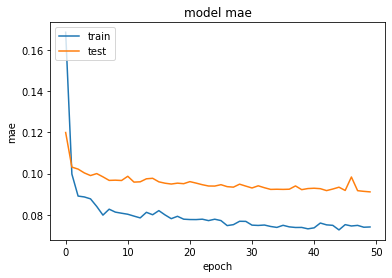

In [80]:
# summarize history for accuracy
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

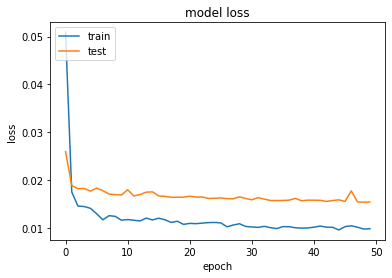

In [81]:
# Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

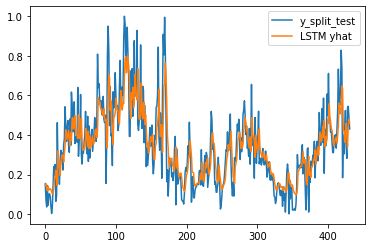

In [82]:
# plot yhat and y_split_test
plt.plot(y_split_test, label='y_split_test')
plt.plot(yhat, label='LSTM yhat')
plt.legend()

# Model Training for Ashok Vihar BiDirectional LSTM

In [83]:
from LSTM_Model import build_bidirectional_lstm_model
from keras.optimizers import Adam

n_steps = 10
n_features = 5
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_dense_units = 50
dense_activation_function = 'tanh'
optimizer = Adam(lr=0.001)

B_model = build_bidirectional_lstm_model(input_shape, num_lstm_units, num_dense_units, dense_activation_function, optimizer)

#  fit model
hist = B_model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)


Epoch 1/50


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



38/38 [==============================] - 3s 17ms/step - loss: 0.0293 - mae: 0.1269 - val_loss: 0.0209 - val_mae: 0.1124
Epoch 2/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0130 - mae: 0.0855 - val_loss: 0.0217 - val_mae: 0.1107
Epoch 3/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0118 - mae: 0.0803 - val_loss: 0.0199 - val_mae: 0.1065
Epoch 4/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0112 - mae: 0.0785 - val_loss: 0.0185 - val_mae: 0.1028
Epoch 5/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0105 - mae: 0.0765 - val_loss: 0.0177 - val_mae: 0.1008
Epoch 6/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0102 - mae: 0.0748 - val_loss: 0.0174 - val_mae: 0.0983
Epoch 7/50
38/38 [==============================] - 0s 10ms/step - loss: 0.0101 - mae: 0.0747 - val_loss: 0.0173 - val_mae: 0.0979
Epoch 8/50
38/38 [==============================] - 0s 9ms/step - loss: 0.0102 - mae: 0.0750 - val

In [84]:
B_yhat = B_model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, B_yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
# R2 score
r2 = r2_score(y_split_test, B_yhat)
print('R2: %.5f' % r2)

14/14 [==============================] - 0s 3ms/step
MSE: 0.01531
RMSE: 0.12372
R2: 0.63017


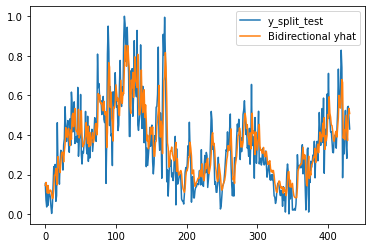

In [85]:
# plot yhat and y_split_test
plt.plot(y_split_test, label='y_split_test')
plt.plot(B_yhat, label='Bidirectional yhat')
plt.legend()

# Model Training for Ashok Vihar ML Models

In [86]:
Xml = aq_df.drop(['Ozone'], axis=1)
yml = aq_df['Ozone']
# to array

Xml = Xml.values
yml = yml.values

print(Xml)
print(yml)

[[5.4290e+01 1.5533e+02 5.1000e-01 ... 7.0000e+00 2.0180e+03 5.0000e+00]
 [5.4490e+01 1.4351e+02 1.2600e+00 ... 7.0000e+00 2.0180e+03 6.0000e+00]
 [7.4420e+01 1.8305e+02 1.0400e+00 ... 7.0000e+00 2.0180e+03 7.0000e+00]
 ...
 [6.4560e+01 1.8097e+02 2.2600e+00 ... 3.0000e+00 2.0230e+03 2.7000e+01]
 [7.3380e+01 1.6089e+02 2.6100e+00 ... 3.0000e+00 2.0230e+03 2.8000e+01]
 [1.1593e+02 2.1167e+02 3.9200e+00 ... 3.0000e+00 2.0230e+03 2.8000e+01]]
[48.61 45.87 59.02 ... 31.95 29.4  26.69]


In [87]:
from sklearn.model_selection import train_test_split
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xml, yml, test_size=0.3, random_state=0)

# MLR Multivariate Linear Regression Model Training for Ashok Vihar

MSE: 173.86771
RMSE: 13.18589
R2: 0.55108


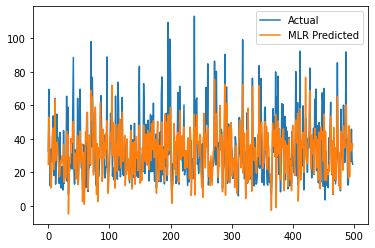

In [88]:
# write the function for the MLR model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_mlr_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the MLR model
mlr_model, mlr_yhat = build_mlr_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
plt.plot(y_test, label='Actual')
plt.plot(mlr_yhat, label='MLR Predicted')
plt.legend()

# Random Forest Model Training for Ashok Vihar

MSE: 94.06914
RMSE: 9.69892
R2: 0.75712


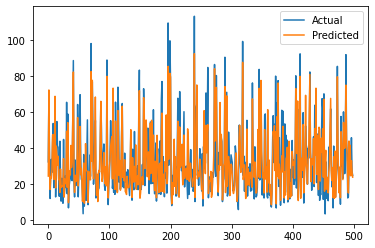

In [89]:

# write the function for the Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_rf_model(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the Random Forest model
rf_model, rf_yhat = build_rf_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
# plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Actual')
plt.plot(rf_yhat, label='Predicted')
plt.legend()
